In [1]:
import os
import fnmatch
import re # https://www.guru99.com/python-regular-expressions-complete-tutorial.html

import string
import shutil
import random
import pandas as pd
os.getcwd()

'/home/gabnmr/Documents/NMR_demo'

In [2]:
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
# import matplotlib
# import pickle

# Functions: find, DNAanalysis & PAanalysis

In [4]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [47]:
def DNAanalysis (DNA,inp,name,N):
    dataR=pd.read_csv(DNA_rest[N],header=0,delim_whitespace=True,index_col=False,engine='python')
    dataU=pd.read_csv(DNA_unrest[N],header=0,delim_whitespace=True,index_col=False,engine='python')
    
    dataR['R/U']='R'
    dataU['R/U']='U'
    
    df_list=[dataR,dataU]
    
    
    # dataR_d=dataR.describe()
    # dataU_d=dataU.describe()
    # dataR_d.to_csv("DNA_rest_{}.csv".format(name))
    # dataU_d.to_csv("DNA_unrest_{}.csv".format(name))
    
    data=pd.concat(df_list)
    # print(data)
    for BP in list(data.columns[1:3]):
        for var in list(data.columns[3:-1]):
            # print(BP)
            # print(var)
            # rise/twist major or minor
            if "Rise" in list(data.columns[3:-1]):
                df = data.drop(data[data.Rise==0].index)
            else:
                df = data.drop(data[data.Minor==0].index)
            
            # sns.set_theme(style="whitegrid")
            # ax = sns.violinplot(data=df.iloc[:,1:],x=BP,y=var,hue="R/U", split=True)
            # # ax.set(ylim=(-80, 80))
            # ax.legend(loc='upper right')
            # fig = ax.get_figure()
            # fig.savefig("DNA_{}_{}_{}_{}.png".format(DNA,var,BP,name))
            # # fig.show()
            # fig.clf()
    df.to_csv("Table_DNA_{}_{}.csv".format(DNA,name))
            
            # ####problematic section###### memory leakage
            # axx = df.plot.line("#Frame",var)
            # axx.legend(loc='upper right')
            # # axx.figure.savefig("DNA_line_{}_{}_{}_{}.png".format(DNA,var,BP,name))
            # fig = axx.get_figure()
            # fig.savefig("DNA_line_{}_{}_{}_{}.png".format(DNA,var,BP,name))
            # # fig.show()
            # fig.clf()

In [6]:
def analysis (inp,name,N):
    s = ['s1','s2','s3','s4','s5','s6','s7','s8']
    f = ['f2','f3','f4','f5','f6','f7','f8']
    o = ['o1','o2','o3','o4','o5','o6','o7','o8']
    
    
    dataR=pd.read_csv(PA_rest[N],header=0,delim_whitespace=True,index_col=False,engine='python')
    dataU=pd.read_csv(PA_unrest[N],header=0,delim_whitespace=True,index_col=False,engine='python')
    
    dataR_d=dataR.describe()
    dataU_d=dataU.describe()
    dataR_d.to_csv("rest_{}.csv".format(name))
    dataU_d.to_csv("unrest_{}.csv".format(name))
    
    dataR['R/U']='R'
    dataU['R/U']='U'
    
    list_SFO=[s,f,o]
    angle=["s","f","o"]
    angle_n=-1
    for SFO in list_SFO:
        angle_n=angle_n+1
        df_list=[dataR.melt(id_vars=["#Frame","R/U"], 
                    value_vars=SFO,var_name="Angle"),
                 dataU.melt(id_vars=["#Frame","R/U"], 
                    value_vars=SFO,var_name="Angle")]
    # df_list=[dataR,dataU]
        data=pd.concat(df_list)
        # print(data)
    
        sns.set_theme(style="whitegrid")
        ax = sns.violinplot(data=data.iloc[:,1:],x="Angle",y="value",hue="R/U", split=True)
        ax.set(ylim=(-80, 80))
        ax.legend(loc='upper right')
        fig = ax.get_figure()
    
        fig.savefig("PA-dihedrals_{}_{}.png".format(name,angle[angle_n]))
        fig.clf()

# run analysis

1) Patterns _range s1-s20 or other if code is changes
2) NB! file name (use find function) + Path Directory
3) for loop (and input to PA analysis)


In [41]:
patterns=[]
for i in range(21):
    patterns.append("s{}".format(i))
patterns.reverse()
count=-1


PA_rest=find('PA_phi_psi_omega_dihedrals', '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/')
PA_unrest=find('PA_phi_psi_omega_dihedrals', '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_unrest1/')
PA_unrest

for i in PA_unrest:
    count=count+1
    for p in patterns:
        if re.search(p,i):
            print("found a match! It is = {}".format(p))
            analysis(i,p,count)
            break


found a match! It is = s13
found a match! It is = s4
found a match! It is = s19
found a match! It is = s8
found a match! It is = s2


<Figure size 432x288 with 0 Axes>

# Run DNA analysis

1) Patterns _range s1-s20 or other if code is changes
2) NB! file name = DNA extension + core File Name + Path
        These should be representative of cpptraj.
3) for loop (and input to DNA analysis)

In [48]:
patterns=[]
for i in range(21):
    patterns.append("s{}".format(i))
patterns.reverse()


DNA=["Helix","BP","BPstep"]
# 3DNA_GTAC_iPr
for param in DNA:

    DNA_rest=find('{}.3DNA_GTAC_iPr'.format(param), '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/')
    DNA_unrest=find('{}.3DNA_GTAC_iPr'.format(param), '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_unrest1/')
    
    count=-1
    for i in DNA_unrest:
        count=count+1
        for p in patterns:
            if re.search(p,i):
                print("found a match! It is = {}".format(p))
                DNAanalysis(param,i,p,count)
                break

found a match! It is = s13
found a match! It is = s4
found a match! It is = s19
found a match! It is = s8
found a match! It is = s2
found a match! It is = s13
found a match! It is = s4
found a match! It is = s19
found a match! It is = s8
found a match! It is = s2
found a match! It is = s13
found a match! It is = s4
found a match! It is = s19
found a match! It is = s8
found a match! It is = s2


# Testing section

In [7]:
DNA_rest=find('*.3DNA_GTAC_iPr', '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/s2')
DNA_unrest=find('*.3DNA_GTAC_iPr', '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_unrest1/s2')
DNA_rest

['/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/s2/BPstep.3DNA_GTAC_iPr',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/s2/BP.3DNA_GTAC_iPr',
 '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/s2/Helix.3DNA_GTAC_iPr']

In [39]:
DNA_rest=find('*.3DNA_GTAC_iPr', '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_rest1/s2')
DNA_unrest=find('*.3DNA_GTAC_iPr', '/home/gabnmr/Documents/NMR_demo/GTAC_iPr/Run_0/fin_analysis_s_unrest1/s2')

dataR=pd.read_csv(DNA_rest[0],header=0,delim_whitespace=True,index_col=False,engine='python')
dataU=pd.read_csv(DNA_unrest[0],header=0,delim_whitespace=True,index_col=False,engine='python')
dataR['R/U']='R'
dataU['R/U']='U'
data_list=[dataR,dataU]

data=pd.concat(data_list)
# data.plot.scatter("#Frame",5)
# data
# data.dropna()
# data.to_csv("test.csv")
# Rise/twist, Minor/Major

if "Rise" in list(data.columns[3:-1]):
    df = data.drop(data[data.Rise==0].index)
else:
    df = data.drop(data[data.Minor==0].index)

df

# for var in list(data.columns[3:-1]):
#     fig, axx = plt.subplots()
#     axx = df.plot.line("#Frame",var)
#     axx.legend(loc='upper right')
#     # sns.set_theme(style="whitegrid")
#     # axx = sns.lineplot(data=df,x="#Frame",y=var)
#     fig = axx.get_figure()
#     fig.savefig("s2_DNA_line_{}_{}_{}_{}.png".format("DNA",var,"BP","name"))
#     # fig.clf()
#     fig.gca().cla()



# df.plot.line("#Frame",5)

# sns.set_theme(style="whitegrid")
# axx = sns.lineplot(data=df,x="#Frame",y="Rise")
# # ax.set(ylim=(-80, 80))
# axx.legend(loc='upper right')
# fig2 = axx.get_figure()     
# # fig=data.plot.line("#Frame",var)
# fig2.savefig("DNA_line_{}_{}_{}_{}.png".format(DNA,var,BP,name))
# fig2.clf()

,#Frame,BP1,BP2,Shift,Slide,Rise,Tilt,Roll,Twist,Zp,R/U
0,1,7-18,8-17,0.8296,0.8366,2.6969,9.4923,-9.4667,34.8971,-1.9962,R
1,1,8-17,9-16,2.2378,1.1781,2.7646,-6.9762,8.1454,44.7756,-0.7805,R
2,1,9-16,10-15,0.6707,-0.8663,3.2014,6.3523,11.8579,22.9810,0.1782,R
3,2,7-18,8-17,1.0469,0.7629,3.0318,11.3698,-15.2971,35.2197,-1.2026,R
4,2,8-17,9-16,2.2362,1.1179,3.1143,0.3903,17.5276,44.8841,-0.6655,R
...,...,...,...,...,...,...,...,...,...,...,...
14995,4999,8-17,9-16,1.9693,0.5555,3.3680,13.5544,11.9943,40.8963,-0.3824,U
14996,4999,9-16,10-15,0.9595,-0.7230,3.1539,-2.0383,13.1232,25.9605,-0.4086,U
14997,5000,7-18,8-17,0.7378,-0.4926,3.4764,-1.1635,-2.9723,32.6591,-0.1087,U
14998,5000,8-17,9-16,1.6492,0.4874,3.6428,16.9381,13.1780,39.7141,-0.4442,U


In [ ]:
df.set_index(['#Frame'], inplace=True)

In [ ]:
tuple(data.BP1.unique())
# dff=df.set_index(['#Frame'], inplace=True)
df.pivot(index='#Frame', columns=['Shift'], values='Roll')


In [ ]:
df

In [ ]:
sns.set_theme(style="whitegrid")
axx = sns.lineplot(data=df,x="#Frame",y="Rise")
# ax.set(ylim=(-80, 80))
axx.legend(loc='upper right')
fig2 = axx.get_figure()     
# fig=data.plot.line("#Frame",var)
fig2.savefig("DNA_line_{}_{}_{}_{}.png".format(DNA,var,BP,name))
fig2.clf()

In [23]:
fig="A"
axx="A"

In [19]:
dff

In [ ]:
data.plot.scatter("#Frame")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='#Frame', ylabel='Major'>

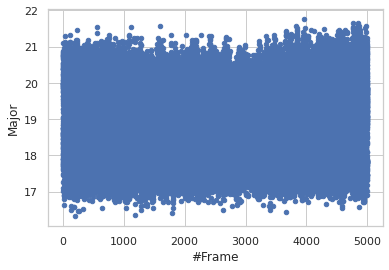

In [274]:
df = data.drop(data[data.Minor==0].index)
df
df.plot.scatter("#Frame","Major")

In [247]:
df_list=[dataR,dataU]
data=pd.concat(df_list)
data
list(data.columns[1:3])
for BP in list(data.columns[1:2]):
    for var in list(data.columns[3:-1]):
        # print(BP)
        # print(var)
        sns.set_theme(style="whitegrid")
        ax = sns.violinplot(data=data.iloc[:,1:],x=BP,y=var,hue="R/U", split=True)
        # ax.set(ylim=(-80, 80))
        ax.legend(loc='upper right')
        fig = ax.get_figure()
        fig.savefig("DNA_{}_{}_{}.png".format("Helix",var,"name"))
        # fig.show()
        fig.clf()
# data.dtypes

BP1
X-disp
BP1
Y-disp
BP1
Rise
BP1
Incl.
BP1
Tip
BP1
Twist


#Frame      int64
BP1        object
BP2        object
X-disp    float64
Y-disp    float64
Rise      float64
Incl.     float64
Tip       float64
Twist     float64
R/U        object
dtype: object

<Figure size 432x288 with 0 Axes>

In [180]:
list_SFO=[s,f,o]
angle=["s","f","o"]
angle_n=-1
SFO=["Shift","Slide","Roll"]
df_list=[dataR.melt(id_vars=["#Frame","R/U","BP1","BP2"], 
            value_vars=["Shift","Slide","Roll"]),
         dataU.melt(id_vars=["#Frame","R/U","BP1","BP2"], 
            value_vars=["Shift","Slide","Roll"])]


# for SFO in list_SFO:
#     angle_n=angle_n+1
#     df_list=[dataR.melt(id_vars=["#Frame","R/U"], 
#                 value_vars=SFO,var_name="Shift"),
#              dataU.melt(id_vars=["#Frame","R/U"], 
#                 value_vars=SFO,var_name="Shift")]
# df_list=[dataR,dataU]
data=pd.concat(df_list)
data

,#Frame,R/U,BP1,BP2,variable,value
0,1,R,3-22,4-21,Shift,-0.0051
1,1,R,4-21,5-20,Shift,-2.7135
2,1,R,7-18,8-17,Shift,0.7327
3,1,R,8-17,9-16,Shift,2.0945
4,1,R,9-16,10-15,Shift,0.7256
...,...,...,...,...,...,...
74995,5000,U,3-22,4-21,Roll,-0.1710
74996,5000,U,4-21,5-20,Roll,2.9228
74997,5000,U,7-18,8-17,Roll,-18.7230
74998,5000,U,8-17,9-16,Roll,19.6944


In [227]:
tuple(dataR.BP1.unique())
tuple(dataR.BP2.unique())
# tuple(dataR.Roll.unique())
tuple(dataR.columns[3:])

('Shift', 'Slide', 'Rise', 'Tilt', 'Roll', 'Twist', 'Zp')

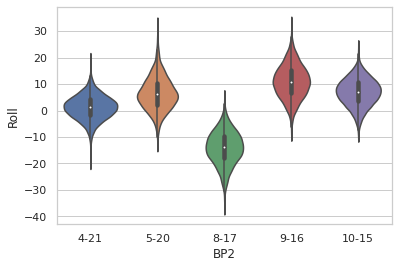

In [133]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(data=dataR.iloc[:,1:],x="BP2",y="Roll")#,hue="R/U", split=True)
# ax.set(ylim=(-80, 80))
# ax.legend(loc='upper right')
# fig = ax.get_figure()
# fig
# fig.savefig("PA-dihedrals_{}_{}.png".format(name,angle[angle_n]))
# fig.clf()

# Old Notebook, for RMSD and phi-psi PA dihedrals

data=pd.read_csv(PA_rest[0],header=0,delim_whitespace=True,index_col=False,engine='python')
data3=pd.read_csv(PA_unrest[0],header=0,delim_whitespace=True,index_col=False,engine='python')
# data=data.add_prefix('R_')
# data3=data3.add_prefix('U_')
data['R/U']='R'
data3['R/U']='U'
data.T

s = ['s1','s2','s3','s4','s5','s6','s7','s8']
f = ['f1','f2','f3','f4','f5','f6','f7','f8']
o = ['o1','o2','o3','o4','o5','o6','o7','o8']
tuples = [('R' if x in s else 'R' if x in f else 'R' if x in o else 'other', x) for x in data.columns.tolist()]
data.columns = pd.MultiIndex.from_tuples(tuples, names=['Modified', 'Original'])
data

s = ['s1','s2','s3','s4','s5','s6','s7','s8']
f = ['f1','f2','f3','f4','f5','f6','f7','f8']
o = ['o1','o2','o3','o4','o5','o6','o7','o8']
tuples = [('U' if x in s else 'U' if x in f else 'U' if x in o else 'other', x) for x in data3.columns.tolist()]
data3.columns = pd.MultiIndex.from_tuples(tuples, names=['Modified', 'Original'])
data3


import itertools

s = ['s1','s2','s3','s4','s5','s6','s7','s8']
f = ['f2','f3','f4','f5','f6','f7','f8']
o = ['o1','o2','o3','o4','o5','o6','o7','o8']

ab = itertools.chain(s,f,o)
# list(ab)

# data=data.melt(id_vars=["#Frame","R/U"], 
#         value_vars=s,var_name="Angle")
# data3=data3.melt(id_vars=["#Frame","R/U"], 
#         value_vars=s,var_name="Angle")
df_list=[data.melt(id_vars=["#Frame","R/U"], 
        value_vars=o,var_name="Angle"),data3.melt(id_vars=["#Frame","R/U"], 
        value_vars=o,var_name="Angle")]
data4=pd.concat(df_list)
data4

# df_list=[data,data3]
# data4=pd.concat(df_list)
data4

sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=data4.iloc[:,1:],x="Angle",y="value",hue="R/U", split=True)
# ax = sns.violinplot(data=data3.iloc[: , 1:], split=True)



#Simulation results
1) Report RMSD vs frame 501
2) Add Configurations that represent specific RMSD
3) repeat 1 adn 2 for the fivve s....

PA results
1) report dihedrals  
    a) Violin plot using the 3 categorical variable approach (set Y axi limit to 60 degreees)
    b) slices description table (mean, min, max, confidence range)
    c) PA only representation + highlighte angles by scheme
    
DNA results

1) report 3DNA parameters
    a) based on BP  report (3 categorical vairable appraoc
    b) Major,minor, Otherkey BPparameters (2-3 more
    b) slice description table mean min max,
    c) depiction of the images.
    
Free Energy calc....

Ensemble of structures, stacked over one another.

sns.set_theme(style="whitegrid")
data2=data.iloc[: , 1:]
ax = sns.violinplot(data=data2, split=True)
ax = sns.violinplot(data=data3.iloc[: , 1:], split=True)

i=5
dff=data
x_true=dff.iloc[:,i]
x_true
y_pred=dff.iloc[:,i+8]
y_pred
y_pred2=dff.iloc[:,0]
# # i=i+1
# rmse=sklearn.metrics.mean_squared_error(y_pred2, y_pred)
# r2=sklearn.metrics.r2_score(y_pred2, y_pred)
# rmse1=sklearn.metrics.mean_squared_error(y_pred2, x_true)
# r21=sklearn.metrics.r2_score(y_pred2, x_true)
# print(rmse, rmse1)
# print(r2, r21)

# plt.plot(y_pred2, y_pred)
plt.plot(y_pred2, x_true)

plt.xlim([0, 5000])
plt.ylim([-360/4, 360/4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(x_true-y_pred)

data.dtypes

data.describe()

sns.set_theme(style="whitegrid")
data2=data.iloc[: , 1:]
ax = sns.violinplot(data=data2)

data=pd.read_csv('PA_phi_psi_omega_dihedrals',header=None)
print(data)

data2=pd.read_csv('violin_test.csv',index_col='#Frame')
data2.describe()
df=data2.columns

#dna=pd.read_csv('BP.3DNA_GTAC_iPr',index_col='#Frame')

import seaborn as sns
#data3=data2.drop(columns=['s1', 'o1', 'f2', 's2', 'o2', 'f3', 's3', 'o3', 'f4', 's4', 'o4', 'f5',
#       's5', 'o5', 'f6', 's6', 'o6', 'f7', 's7', 'o7', 'f8', 's8', 'o8'])
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=data2)
#https://chartio.com/learn/charts/violin-plot-complete-guide/
#PA in complex micro secomd

import seaborn as sns
data3=data2.drop(columns=['s1', 's2','s3', 's4', 
                          's5', 's6', 's7', 's8'])
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=data3)
#https://chartio.com/learn/charts/violin-plot-complete-guide/

import seaborn as sns
data3=data2.drop(columns=['f2', 'f3', 'f4', 'f5',
      'f6', 'f7', 'f8'])
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=data3)
#https://chartio.com/learn/charts/violin-plot-complete-guide/

import seaborn as sns
data3=data2.drop(columns=[ 'o1', 'f2', 'o2', 'f3', 'o3', 'f4', 'o4', 'f5',
        'o5', 'f6', 'o6', 'f7',  'o7', 'f8', 'o8'])
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data=data3)
#https://chartio.com/learn/charts/violin-plot-complete-guide/
plt.savefig("S1-S8_GTAC.png")

In [ ]:
#Plot Free and Bound version of a PA. See phi, psi angle distributions.

# compare the distribution between NMR restrained version and non NMR restrined version to Free PA

# Draw a picture of where f# s# and o# lie



In [ ]:
# plot Free and Complex version fo DNA parameters and their distributions

# compare the NMR restrained to non NMR restrained

# compare the above to the free version (NMR restrained and non NMR resta

In [ ]:
#dna_parm=pd.read_

In [ ]:

#The Free PA and bounded PA phi psi and omega torsion angles show that there is a dominnant induced conformaiton for the PA when in complex.

#It would be worth while to compare the distribution of DNA complex and free DNA and see whether there is induced fit as well or it adops a particular conformaiton 
#for a much longer period of time (shifting the distribution)

#Find correlation or a parameter that can monitor this - a distance between phoshate back bones, change in total surfaace area. 

# ask the questions whether ligands with a conformaiton distribution closer to the bond state are more favourable to bind there.
# ask what and how is the enthalpy and entropy change caused by this induced fit.
# think about how docking protocols should be made in place.
# ask how FEP can be helpful. 

In [13]:
# compare to other complexwes - Hoegstaff ligand? Linear,hairpin, 

#MM/PBSA, MM/GBSA  (try, quiqer but less accurate)(generalised born) MM/3DRISM (exp)
#PBSA - amber manual